In [15]:
%run "../../PyUtils/common.ipynb"
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcess
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import ensemble
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from statsmodels.regression.quantile_regression import QuantReg
import statsmodels.formula.api as smf
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

patient="uhy"
ampm="am"
file="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20calculated_jlee%20WHERE%20ampm=%27"+ampm+"%27%20AND%20pname=%27"+patient+"%27%20ORDER%20BY%20date,%20time"

predictQuantile=False
lowerPercent = 0.20
upperPercent = 0.80

fileName = file;

dfOriginal = LoadDataSet(fileName, checkForDateTime=False);
#displayDFs (dfOriginal, maxrows=3 )
#for c in dfOriginal.columns: print (c,  end=', ')
dfOriginal

<IPython.core.display.Javascript object>

,pname,date,ampm,time,pef,pef_zone,tm_window,so2_max,co_max,o3_max,no2_max,pm10_max,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,winddirection,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperature_max,airpressure_max,precipitation_max,temperature_min,airpressure_min,precipitation_min,temperature_diff,airpressure_diff,precipitation_diff
0,uhy,2014-01-02,am,09:58:00,368,G,24.450,0.015,1.300,0.026,0.044,108.000,0.254,16.363,0.419,0.630,1948.783,0.010,0.669,0.017,0.026,79.705,0.300,1.900,20.000,48.000,3.000,-9.400,1014.000,1022.600,-0.100,7.200,1014.000,82.000,0.300,1004.600,48.000,6.900,9.400,34.000
1,uhy,2014-01-03,am,09:30:00,310,G,23.533,0.011,2.200,0.023,0.077,90.000,0.225,23.727,0.192,1.136,1180.400,0.010,1.008,0.008,0.048,50.159,1.200,0.900,160.000,62.000,4.200,-5.200,1009.000,1017.600,0.300,5.700,1015.100,70.000,0.300,1008.900,37.000,5.400,6.200,33.000
2,uhy,2014-01-04,am,09:31:00,326,G,24.017,0.014,2.200,0.015,0.084,117.000,0.215,18.910,0.191,0.952,1306.317,0.009,0.787,0.008,0.040,54.392,-2.700,4.500,20.000,59.000,3.000,-9.600,1011.600,1020.300,-0.800,6.600,1011.600,96.000,-3.000,1006.400,56.000,9.600,5.200,40.000
3,uhy,2014-01-05,am,11:01:00,328,G,25.500,0.007,0.800,0.022,0.042,58.000,0.170,15.402,0.281,0.679,1089.650,0.007,0.604,0.011,0.027,42.731,-0.800,2.600,340.000,53.000,3.000,-9.200,1015.600,1024.300,3.700,2.700,1015.600,62.000,-3.500,1009.800,50.000,6.200,5.800,12.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,uhy,2015-11-18,am,09:22:00,307,G,24.000,0.006,1.100,0.048,0.040,50.000,0.115,13.937,0.567,0.690,568.000,0.005,0.581,0.024,0.029,23.667,13.000,4.100,110.000,80.000,11.900,9.600,1011.300,1019.900,11.200,16.900,1012.200,97.000,11.200,1009.700,66.000,5.700,2.500,31.000
686,uhy,2015-11-19,am,10:33:00,295,Y,25.183,0.005,0.600,0.031,0.033,24.000,0.095,10.100,0.443,0.691,220.567,0.004,0.401,0.018,0.027,8.758,9.400,3.700,140.000,84.000,9.900,6.800,1015.200,1023.900,10.500,13.000,1015.800,98.000,7.500,1010.400,77.000,5.500,5.400,21.000
687,uhy,2015-11-20,am,10:32:00,251,Y,23.983,0.008,1.000,0.018,0.032,47.000,0.102,14.153,0.189,0.664,718.267,0.004,0.590,0.008,0.028,29.949,9.900,1.100,360.000,98.000,11.900,9.500,1015.700,1024.500,11.700,11.300,1015.800,98.000,8.700,1012.400,84.000,2.600,3.400,14.000
688,uhy,2015-11-21,am,11:04:00,234,Y,24.533,0.008,1.300,0.019,0.038,89.000,0.126,20.507,0.166,0.705,1316.000,0.005,0.836,0.007,0.029,53.641,9.000,2.100,340.000,68.000,7.700,3.300,1019.300,1028.100,14.000,13.300,1019.500,98.000,5.800,1014.400,68.000,7.500,5.100,30.000


In [16]:
#Break into groups by percentage

dfOriginal.sort_values(by='pef', ascending=True, inplace=True)
dfOriginal.reset_index(drop=True, inplace=True)
numberOfElements = len(dfOriginal)
upperBoundary = upperPercent*numberOfElements
lowerBoundary = lowerPercent*numberOfElements
dfOriginal['percent_group']=-1

for i in dfOriginal.index:

    if i < lowerBoundary:
        dfOriginal['percent_group'][i] = 0

    elif i > upperBoundary : 
        dfOriginal['percent_group'][i] = 2

    else:
        dfOriginal['percent_group'][i] = 1

print(dfOriginal)

    pname        date ampm      time  pef pef_zone  tm_window  so2_max  co_max  o3_max  no2_max  pm10_max  so2_sum  co_sum  o3_sum  no2_sum  pm10_sum  so2_avg  co_avg  o3_avg  no2_avg  pm10_avg  temperaturec  windspeedms  winddirection  precipitationpercent  vaporpressurehpa  dewpointtemperaturec  airpressurehpa  sealevelpressurehpa  groundtemperaturec  temperature_max  airpressure_max  precipitation_max  temperature_min  airpressure_min  precipitation_min  temperature_diff  airpressure_diff  precipitation_diff  percent_group
0     uhy  2014-12-22   am  09:48:00  158        R     23.850    0.007   1.000   0.018    0.036    44.000    0.119  13.825   0.265    0.379   697.700    0.005   0.580   0.011    0.016    29.254        -6.100        3.800        160.000                99.000             3.800                -6.200        1013.600             1022.900              -1.600           -2.300         1015.300             99.000           -7.900         1012.200             37.000        

In [17]:
df=dfOriginal.copy()

#1. Remove all the rows that does not have any pef values 

df=df.reset_index(drop=True)

#2. Combine 
df=df.fillna(0)
sdttm = df.date + " " + df.time
df.insert(0, 'sdttm', sdttm)
df.sdttm = pd.to_datetime(df.sdttm)

df.sort_values(by='sdttm', ascending=True, inplace=True)
alldrps = "cname, pname, date, time, ampm, timeofday, dateofmeasure, npt, pef1, pef2, pef3, temperature_diff, airpressure_diff, precipitation_diff, tm_window"
if predictQuantile:
    alldrps += ', pef_zone'
else:
    alldrps += ', percent_group'
drps  = alldrps.split(', ')
df=df.drop(drps, axis=1, errors='ignore')
df=df.reset_index(drop=True)

## <== do the following for SAP PA tool
#pef = df.pef;
#df=df.drop(['pef'], axis=1)
#df.insert(1, 'pef1', pef)

#pef[-10:]=0     # Set last 10 to zero for predictions
#df.insert(1, 'pef', pef)
#df.to_csv("HanD/hand1.csv", sep=';')

df1 = df.copy()
df1 = df1.set_index(df1.sdttm)
df1=df1.drop('sdttm', axis=1, errors='ignore')

nq = 5
lnq=list(range(0,nq))
s= pd.qcut(df1.pef, nq, labels=lnq )
df1.insert(1,"pefcat", s)
df1.pefcat = df1.pefcat.astype(str)

pefcol = df1['pef']

columns =  '''so2_max,co_max,o3_max,no2_max,pm10_max,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,winddirection,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,
 temperature_max,airpressure_max,precipitation_max,temperature_min,airpressure_min,precipitation_min'''

if predictQuantile:
    columns += ',percent_group'
else:
    columns += ',pef_zone'


#'''pefcat,pef_zone,so2_max,co_max,o3_max,no2_max,temperaturec,windspeedms,precipitationpercent,vaporpressurehpa,
#dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperature_max,airpressure_max,temperature_min'''

 
#amin,pmin,tmaxlesstmin,amaxlessamin,pmaxlesspmin'''
cs = [c.strip() for c in columns.split(',')]

df1=df1[cs]
#HTML(df1.to_html())
#displayDFs (df1, maxrows=3 )
df1

,so2_max,co_max,o3_max,no2_max,pm10_max,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,winddirection,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperature_max,airpressure_max,precipitation_max,temperature_min,airpressure_min,precipitation_min,pef_zone
sdttm,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-02 09:58:00,0.015,1.300,0.026,0.044,108.000,0.254,16.363,0.419,0.630,1948.783,0.010,0.669,0.017,0.026,79.705,0.300,1.900,20.000,48.000,3.000,-9.400,1014.000,1022.600,-0.100,7.200,1014.000,82.000,0.300,1004.600,48.000,G
2014-01-03 09:30:00,0.011,2.200,0.023,0.077,90.000,0.225,23.727,0.192,1.136,1180.400,0.010,1.008,0.008,0.048,50.159,1.200,0.900,160.000,62.000,4.200,-5.200,1009.000,1017.600,0.300,5.700,1015.100,70.000,0.300,1008.900,37.000,G
2014-01-04 09:31:00,0.014,2.200,0.015,0.084,117.000,0.215,18.910,0.191,0.952,1306.317,0.009,0.787,0.008,0.040,54.392,-2.700,4.500,20.000,59.000,3.000,-9.600,1011.600,1020.300,-0.800,6.600,1011.600,96.000,-3.000,1006.400,56.000,G
2014-01-05 11:01:00,0.007,0.800,0.022,0.042,58.000,0.170,15.402,0.281,0.679,1089.650,0.007,0.604,0.011,0.027,42.731,-0.800,2.600,340.000,53.000,3.000,-9.200,1015.600,1024.300,3.700,2.700,1015.600,62.000,-3.500,1009.800,50.000,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-18 09:22:00,0.006,1.100,0.048,0.040,50.000,0.115,13.937,0.567,0.690,568.000,0.005,0.581,0.024,0.029,23.667,13.000,4.100,110.000,80.000,11.900,9.600,1011.300,1019.900,11.200,16.900,1012.200,97.000,11.200,1009.700,66.000,G
2015-11-19 10:33:00,0.005,0.600,0.031,0.033,24.000,0.095,10.100,0.443,0.691,220.567,0.004,0.401,0.018,0.027,8.758,9.400,3.700,140.000,84.000,9.900,6.800,1015.200,1023.900,10.500,13.000,1015.800,98.000,7.500,1010.400,77.000,Y
2015-11-20 10:32:00,0.008,1.000,0.018,0.032,47.000,0.102,14.153,0.189,0.664,718.267,0.004,0.590,0.008,0.028,29.949,9.900,1.100,360.000,98.000,11.900,9.500,1015.700,1024.500,11.700,11.300,1015.800,98.000,8.700,1012.400,84.000,Y
2015-11-21 11:04:00,0.008,1.300,0.019,0.038,89.000,0.126,20.507,0.166,0.705,1316.000,0.005,0.836,0.007,0.029,53.641,9.000,2.100,340.000,68.000,7.700,3.300,1019.300,1028.100,14.000,13.300,1019.500,98.000,5.800,1014.400,68.000,Y


In [18]:
# from sklearn.neural_network import MLPClassifier
# nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

# clf = nn;

# Y_SCALER = None
# #Normalize the input and save the scalar for outcome variable "pefmax" in this case.
# scaler = StandardScaler()
# dp = prepareDF(df1, True)
# for c in dp.columns:
#     if ( c == 'pefcat'):
#         #Y_SCALER = StandardScaler()
#         #dp[c] = Y_SCALER.fit_transform(dp[c])
#         pass;
#     else:
#         dp[c] = scaler.fit_transform(dp[c])
        
# #dp = dp["so2,pef,o3,co,no2,pm10,tmax".split(',')]
# dp1 = dp.set_index(pd.Series(range(0,len(dp)) ) )

# X = dp1.ix[:, dp1.columns != 'pefcat']
# y = dp1.pefcat 
# X = X.as_matrix().astype(np.float)


# kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True)
# y_pred = y.copy()

# # Iterate through folds\
# i = 0;
# for train_index, test_index in kf.split(X):
#     #print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train = y[train_index]
#     # Initialize a classifier with key word arguments\
#     print ("*",i, end ="");
#     clf.fit(X_train,y_train)
#     y_pred[test_index] = clf.predict(X_test)
#     i = i +1;



Feature space holds 689 observations and 30 features
Unique target labels: ['G' 'Y' 'R']
* 0* 1* 2* 3* 4*
   DecisionTree Gini accuracy: 0.616836 
   DecisionTree Gini r^2 score: -0.614649
* 0* 1* 2* 3* 4*
   DecisionTree Entr accuracy: 0.622642 
   DecisionTree Entr r^2 score: -0.585347
* 0* 1* 2* 3* 4*
                 SVM accuracy: 0.602322 
                 SVM r^2 score: -0.676335
* 0* 1* 2* 3* 4*
       Random Forest accuracy: 0.603774 
       Random Forest r^2 score: -0.674793
* 0* 1* 2* 3* 4*
                K-NN accuracy: 0.621190 
                K-NN r^2 score: -0.600769
* 0* 1* 2* 3* 4*
   Gradient Boosting accuracy: 0.593614 
   Gradient Boosting r^2 score: -0.717974
* 0* 1* 2* 3* 4*
    Logit Regression accuracy: 0.609579 
    Logit Regression r^2 score: -0.650118
* 0* 1* 2* 3* 4*
         Naive Bayes accuracy: 0.525399 
         Naive Bayes r^2 score: -0.952383


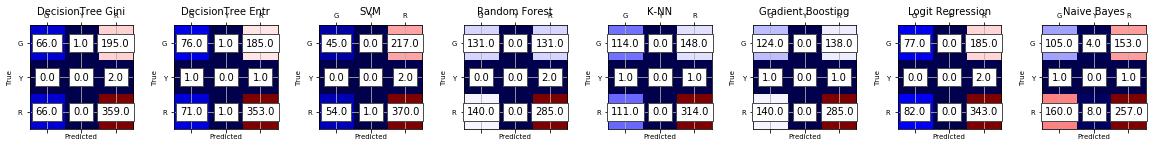

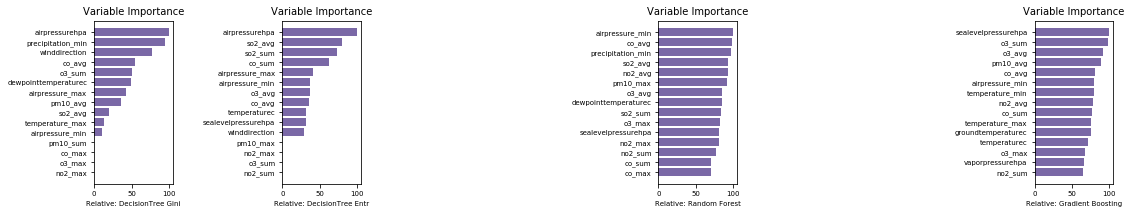

DecisionTree Gini Metrics
             precision    recall  f1-score   support

    class 0       0.00      0.00      0.00         2
    class 1       0.00      0.00      0.00       425
    class 2       0.35      0.74      0.48       262

avg / total       0.13      0.28      0.18       689

DecisionTree Entr Metrics
             precision    recall  f1-score   support

    class 0       0.01      0.50      0.01         2
    class 1       0.50      0.00      0.00       425
    class 2       0.34      0.71      0.46       262

avg / total       0.44      0.27      0.18       689

SVM Metrics
             precision    recall  f1-score   support

    class 0       0.00      0.00      0.00         2
    class 1       1.00      0.00      0.00       425
    class 2       0.37      0.83      0.51       262

avg / total       0.76      0.32      0.20       689

Random Forest Metrics
             precision    recall  f1-score   support

    class 0       0.00      0.00      0.00         2
   

In [19]:
from sklearn.naive_bayes import GaussianNB

predictColumn = "pefcat"
predictColumn = "pef_zone"
if predictQuantile:
    predictColumn = "percent_group"

if ( 'pefcat' in df1.columns ):
    df1.pefcat = df1.pefcat.astype(int)
    df1=df1.drop('pefcat', axis=1)

cls = [# Comment/uncomment out any classfiers according to your need 
       # DO NOT CHANGE
        "DecisionTree Gini" , tree.DecisionTreeClassifier(max_depth=4, criterion="gini"),
        "DecisionTree Entr" , tree.DecisionTreeClassifier(max_depth=4, criterion="entropy"), 
        "SVM"               , sklearn.svm.SVC(kernel="linear"), 
#        "SVM1"              , SVC(kernel="rbf", C=10**3),
        "Random Forest"     , sklearn.ensemble.RandomForestClassifier(),
        "K-NN"              , sklearn.neighbors.KNeighborsClassifier(),
        "Gradient Boosting" , sklearn.ensemble.RandomForestClassifier(),
        "Logit Regression"  , sklearn.linear_model.LogisticRegression(),
#        "Neural NW"         , MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(25, 10), random_state=1),
        "Naive Bayes"       , GaussianNB()
];

y = df1[predictColumn]
X = df1.drop(predictColumn, axis=1)
a = Classify(X,y, True, drawConfusionMatrix=True, classifiers=cls, scale=True)
ik = 0
y_preds=[]
clsNames=[]

for i in cls:
    if type(i) is str:
        clsNames.append(i)
        y_pred = a[4][i]
        y_preds.append(y_pred)
        target_names = ['class 0', 'class 1', 'class 2']
        print(i + ' Metrics')
        y.replace(to_replace="R", value=0, inplace=True, limit=None, regex=False, method='pad', axis=None)
        y.replace(to_replace="Y", value=1, inplace=True, limit=None, regex=False, method='pad', axis=None)
        y.replace(to_replace="G", value=2, inplace=True, limit=None, regex=False, method='pad', axis=None)
        print(classification_report(y, y_pred, target_names=target_names))


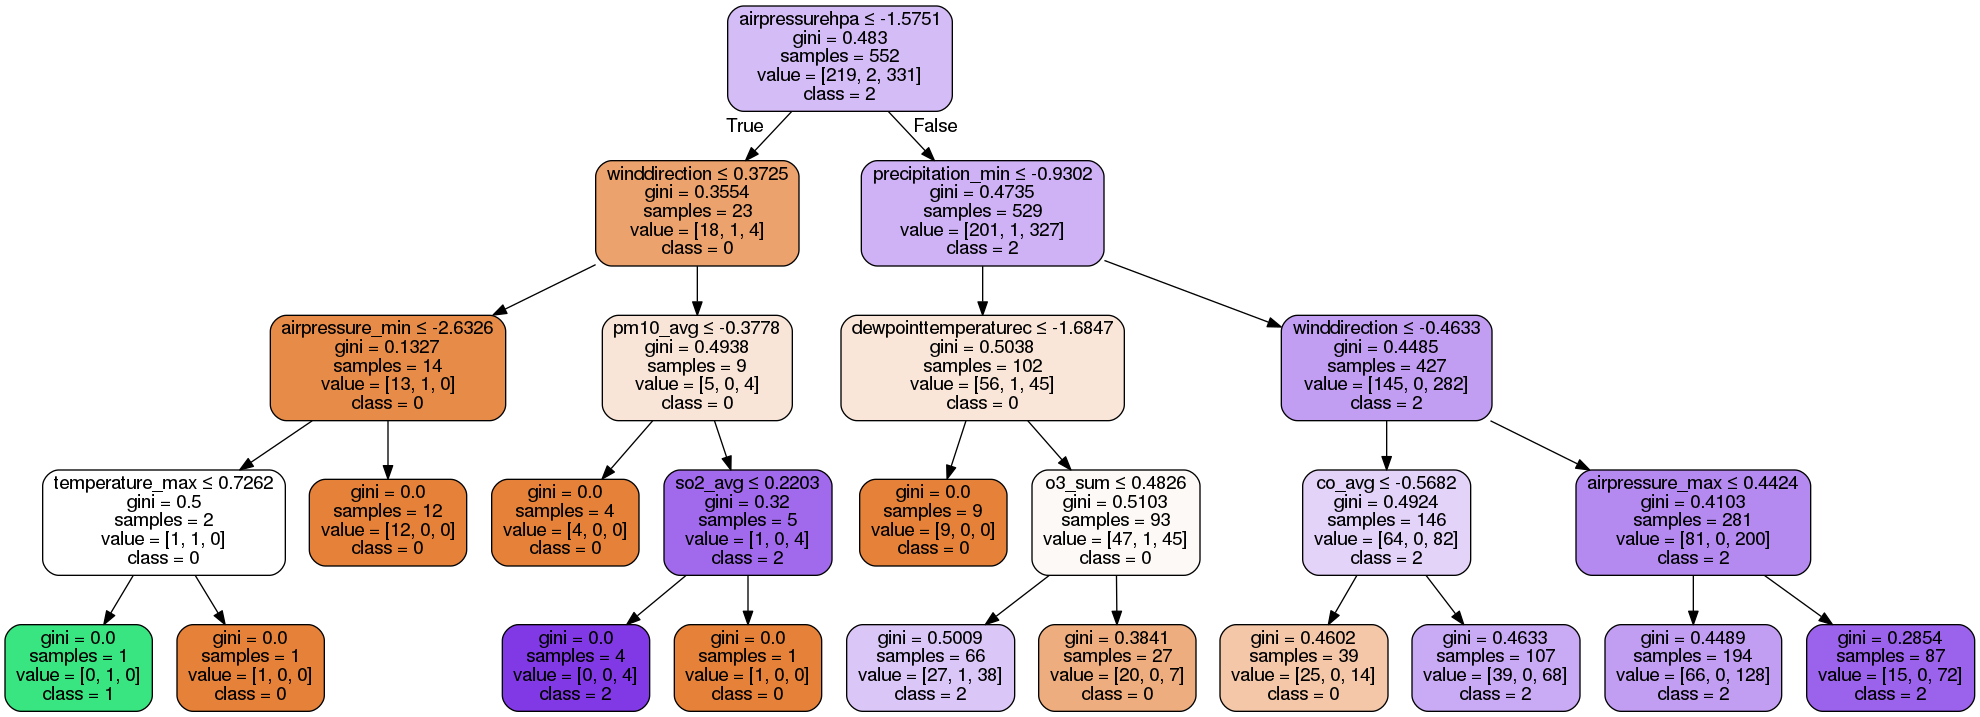

In [20]:
#(X1,y1,ra,cls) = Classify1(X,y, True, drawConfusionMatrix=True, classifiers=cls, scale=False)
DrawDecisionTree(X,y, cls[1])


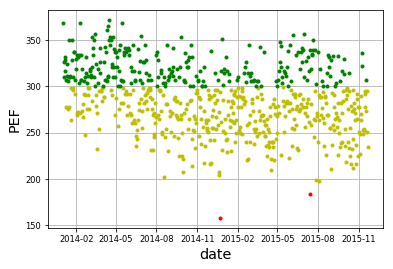

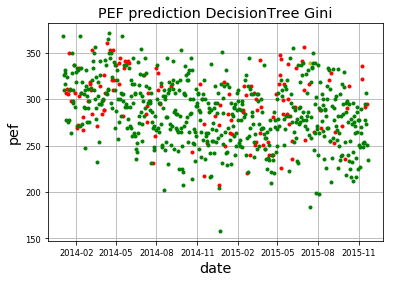

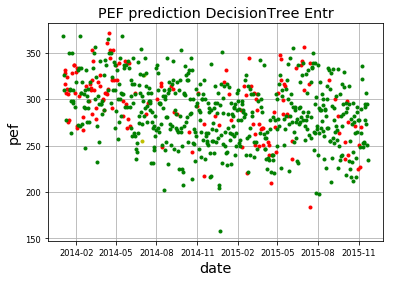

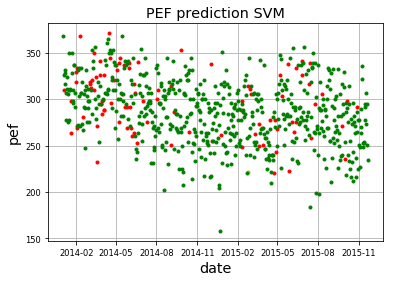

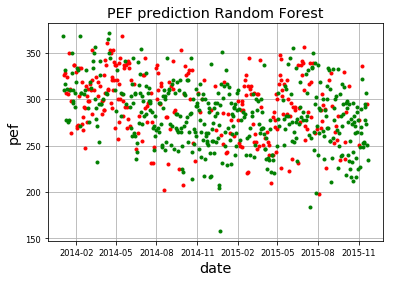

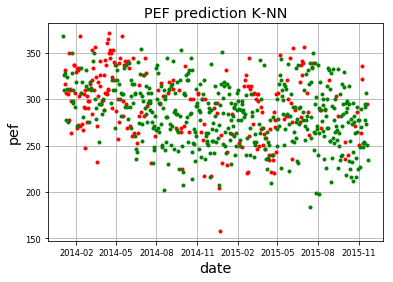

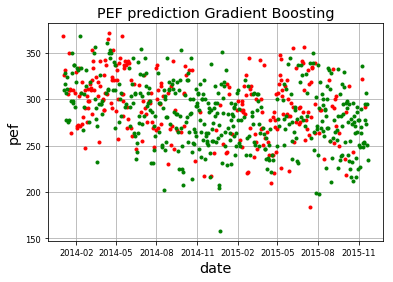

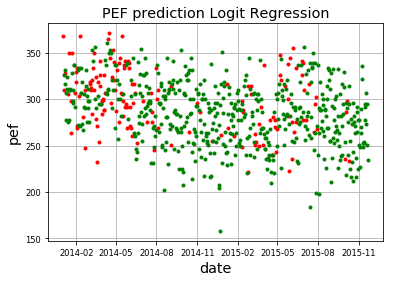

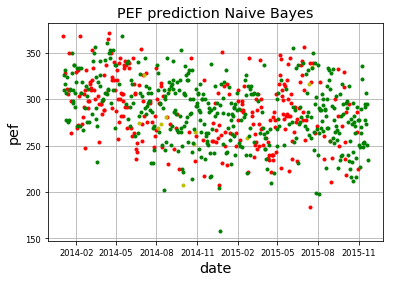

In [21]:
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}

plt.rcParams.update(params)


#print(size(pefcol.values))
#print(size(y))
#print(y_pred)

plt.plot(pefcol.index[y == 0],pefcol.values[y == 0],'r.',pefcol.index[y == 1],pefcol.values[y == 1],'y.',pefcol.index[y == 2],pefcol.values[y == 2],'g.')

plt.xlabel('date')
plt.ylabel('PEF')
#plt.title('PEF true')
plt.grid(True)

plt.savefig('uhy.eps')

plt.show()

i=0

for ypredicted in y_preds:
        plt.plot(pefcol.index[ypredicted == 0],pefcol.values[ypredicted == 0],'r.',pefcol.index[ypredicted == 1],pefcol.values[ypredicted == 1],'y.',pefcol.index[ypredicted == 2],pefcol.values[ypredicted == 2],'g.')

        plt.xlabel('date')
        plt.ylabel('pef')
        plt.title('PEF prediction ' + clsNames[i])
        plt.grid(True)
        plt.show()
        i+=1